<a href="https://colab.research.google.com/github/Raudhil/Machine-Learning-2025/blob/main/Jobsheet%207/TG7_2341720164_RAUDHIL_FIRDAUS_NAUFAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

**Langkah 1: Persiapan Data**

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Langkah 2: Import Library**

In [62]:
# import package
import numpy as np
import pandas as pd

**Langkah 3: Baca Data**

In [63]:
# baca data dari file CSV
data = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(data)

**Langkah 4: Pemahaman Terhadap Data**

In [64]:
# melihat beberapa data awal
df.head()

# mengecek ukuran data
df.shape

# informasi tentang data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

**Langkah 5: Visualisasi Data**

In [65]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

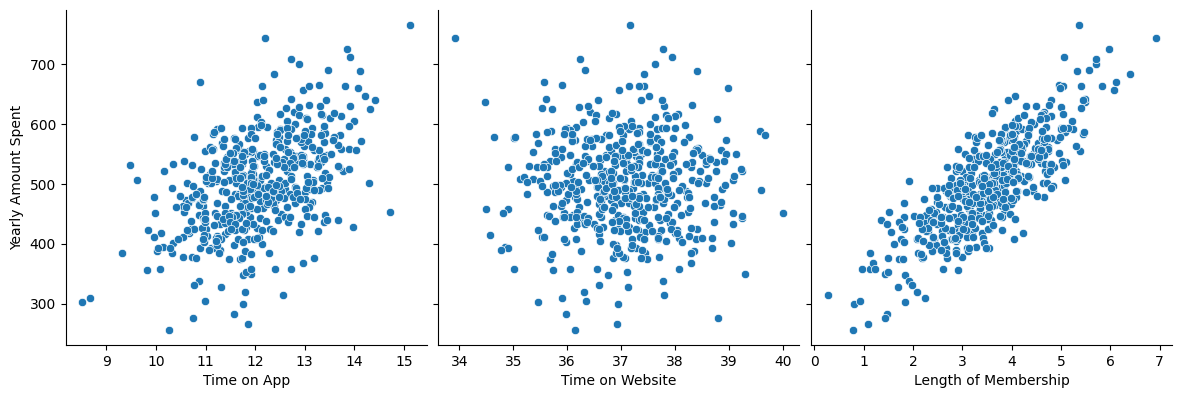

In [66]:
# visualisasi data dengan pairplot
sns.pairplot(df, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
               y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

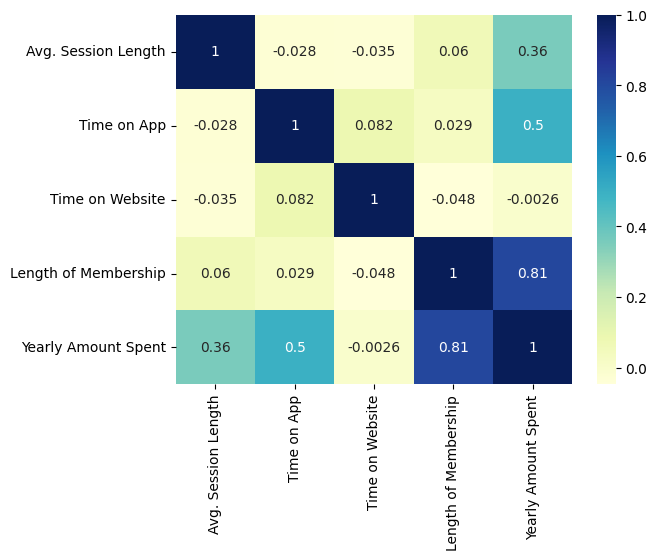

In [67]:
# visualisasi korelasi dengan heatmap
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True)
plt.show()

**Langkah 6: Regresi Linier**

In [68]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = df['Length of Membership']
y = df['Yearly Amount Spent']

In [69]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

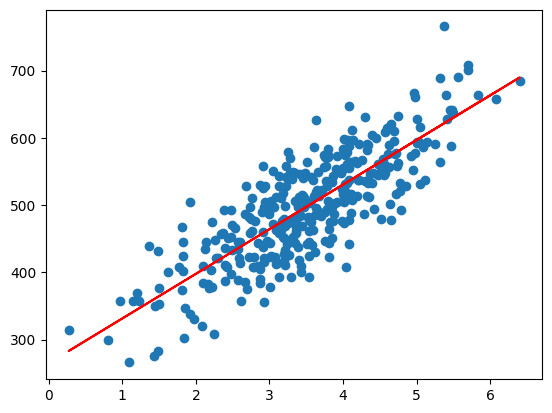

In [71]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

**Langkah 7: Analisis Residual**

In [72]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


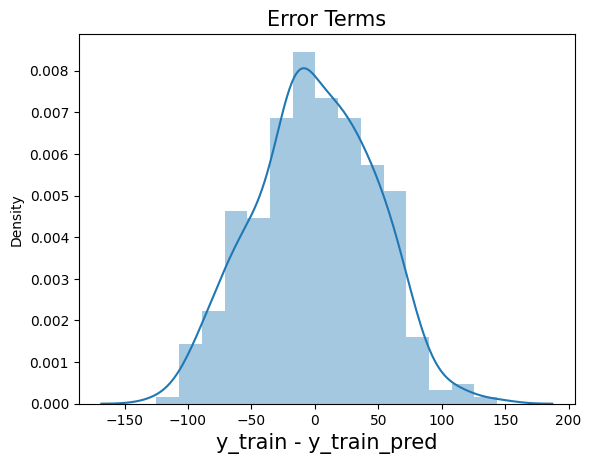

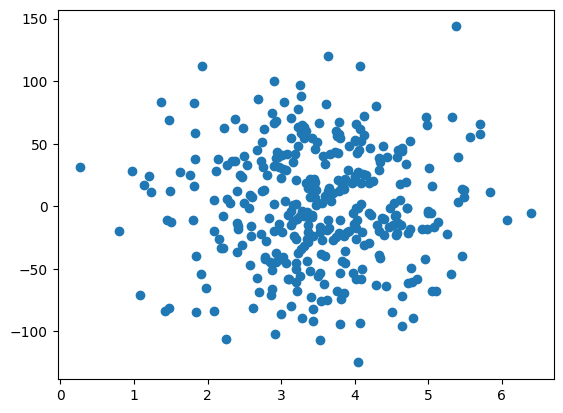

In [73]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

**Langkah 8: Prediksi pada Data Uji dan Evaluasi Model**

In [74]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [75]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

**Langkah 9: Visualisasi Hasil**

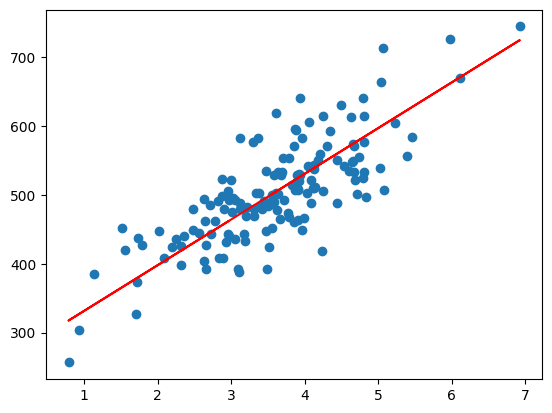

In [76]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# **Praktikum 2**

**Mengimpor Library:**

In [77]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Mengimpor Dataset:**

In [78]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

**Feature Scaling:**

In [79]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

**Fitting SVR ke Dataset:**

In [80]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Visualisasi Hasil SVR:**

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


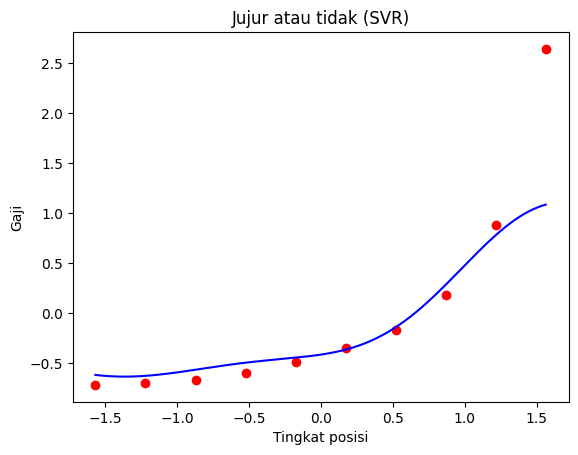

In [81]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

**Prediksi Hasil:**

In [82]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

**Menampilkan Hasil:**

In [84]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


**Validasi Hasil:**

/tmp/ipython-input-875505844.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


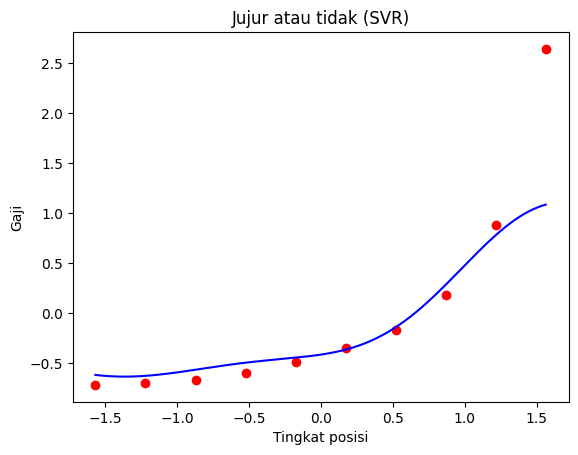

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [83]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

**Evaluasi Model SVR**

In [85]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# **Tugas Praktikum**

**Tugas 1: Multiple Linear Regression**

In [87]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
# baca data dari file CSV
data = '/content/drive/MyDrive/insurance.csv'
df = pd.read_csv(data)

In [89]:
# melihat beberapa data awal
df.head()

# mengecek ukuran data
df.shape

# informasi tentang data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

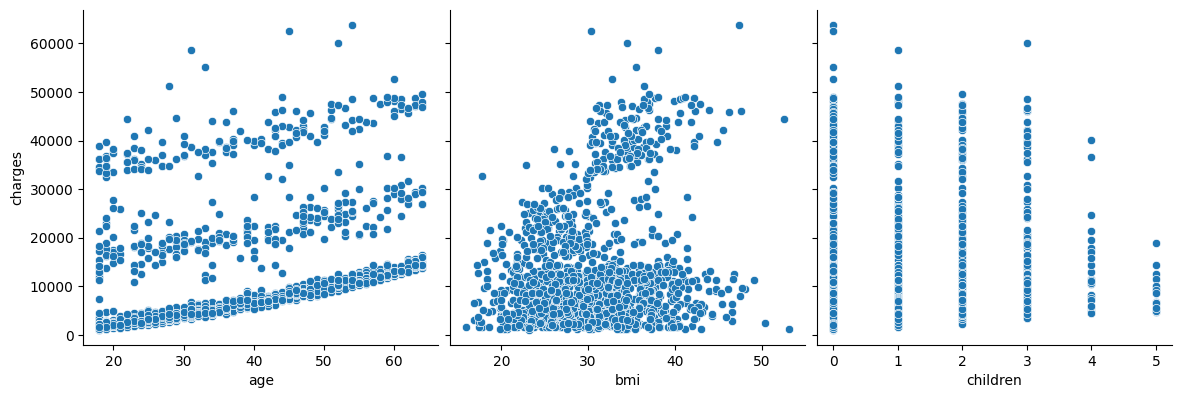

In [91]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

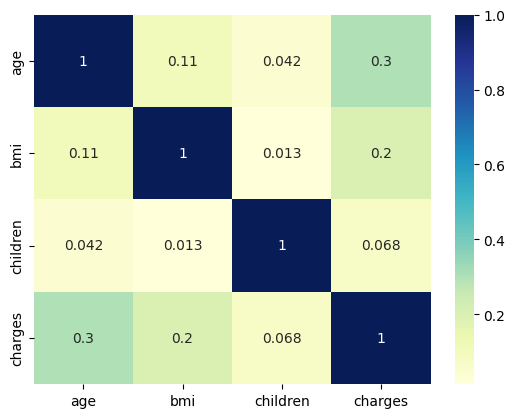

In [92]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True)
plt.show()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [93]:


X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

Dataset yang digunakan adalah insurance.csv yang isinya data mengenai biaya medis personal.

Variabel:
- age: usia penerima manfaat
- sex: jenis kelamin (male/female)
- bmi: indeks massa tubuh
- children: jumlah anak/tanggungan
- smoker: status perokok (yes/no)
- region: wilayah tempat tinggal (northeast, southeast, southwest, northwest)

Variabel target adalah 'charges', yaitu biaya medis personal yang dikeluarkan.

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.



3. Lakukan feature scaling jika diperlukan.


In [94]:
X_encoded = pd.get_dummies(X, drop_first=True).astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, train_size=0.7, test_size=0.3, random_state=100
)


In [95]:
numerical_cols = ['age', 'bmi', 'children']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data latih setelah penskalaan:")
print(X_train.head())
print("\nData uji setelah penskalaan:")
print(X_test.head())

Data latih setelah penskalaan:
           age       bmi  children  sex_male  smoker_yes  region_northwest  \
966   0.847399 -1.010333  0.744470         1           1                 1   
522   0.847399  0.434176 -0.914635         0           0                 0   
155   0.349938  1.397181 -0.914635         1           0                 1   
671  -0.716049  0.113174 -0.914635         0           0                 0   
1173 -0.076457 -0.207828  0.744470         1           0                 1   

      region_southeast  region_southwest  
966                  0                 0  
522                  0                 0  
155                  0                 0  
671                  0                 0  
1173                 0                 0  

Data uji setelah penskalaan:
          age       bmi  children  sex_male  smoker_yes  region_northwest  \
12  -1.142444  0.594677 -0.914635         1           0                 0   
306 -0.787115 -0.528830  0.744470         0           0   

4. Buat model multiple linear regression menggunakan Scikit-Learn.



In [96]:
linear_reg_model = LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.



In [97]:
linear_reg_model.fit(X_train, y_train)

y_pred_linear_reg = linear_reg_model.predict(X_test)

print("Prediksi pada data uji telah selesai.")

Prediksi pada data uji telah selesai.


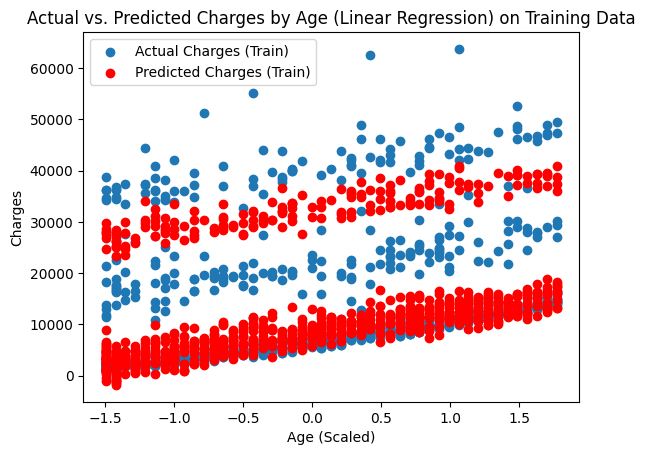

In [99]:
plt.scatter(X_train['age'], y_train, label='Actual Charges (Train)')
plt.scatter(X_train['age'], linear_reg_model.predict(X_train), color='red', label='Predicted Charges (Train)')
plt.xlabel("Age (Scaled)")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted Charges by Age (Linear Regression) on Training Data")
plt.legend()
plt.show()

In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_linear_reg)
mse_lr = mean_squared_error(y_test, y_pred_linear_reg)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_linear_reg)

print("Evaluasi Model Multiple Linear Regression:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

Evaluasi Model Multiple Linear Regression:
MAE: 3943.3176222087222
MSE: 32339047.243733287
RMSE: 5686.743113921472
R-squared: 0.7772757454435645


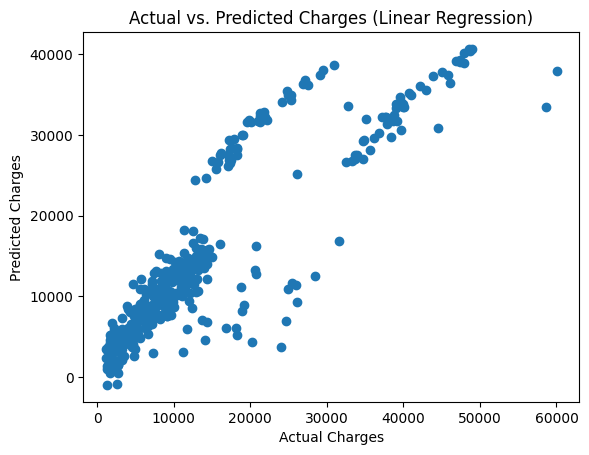

In [ ]:
# Visualisasi hasil prediksi Linear Regression vs data aktual
plt.scatter(y_test, y_pred_linear_reg)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Linear Regression)")
plt.show()

**Analisis**

Dengan nilai R-squared = 0.777 pada data uji, model regresi linier berganda yang dilatih mampu menjelaskan sekitar 77,7% variasi dalam biaya medis personal. Ini menunjukkan bahwa variabel yang digunakan, seperti usia, jenis kelamin, BMI, jumlah anak, status perokok, dan wilayah, memiliki pengaruh yang signifikan terhadap biaya medis. Menurut analisis korelasi (heatmap) dan pengetahuan umum, atribut smoker memiliki pengaruh terbesar pada biaya, diikuti oleh "usia" dan "bmi". Selain itu, visualisasi charges yang sebenarnya dibandingkan dengan charges yang diprediksi menunjukkan bahwa model cenderung memprediksi dengan baik untuk sebagian besar data, meskipun ada beberapa prediksi yang agak menyimpang.